In [17]:
cd ML

d:\ML


In [30]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("dataset/nifty.csv")
df

,Open,High,Low,Close,Volume
0,257.35,257.35,236.20,241.10,1027
1,240.00,240.75,224.85,231.30,689
2,231.00,235.85,230.35,230.95,412
3,231.00,242.50,229.95,241.00,557
4,242.00,256.90,242.00,253.75,939
...,...,...,...,...,...
370,130.00,133.25,130.00,132.80,4757
371,132.65,133.00,128.25,128.25,3012
372,128.25,129.40,127.55,128.50,2290
373,128.60,131.90,128.20,131.00,3728


In [31]:
df = pd.DataFrame(data)

# Number of rows in the DataFrame
num_rows = len(df)

# Create a DatetimeIndex with one-minute intervals
start_time = pd.Timestamp('2024-04-05 09:30:00')  # Start time for trading
end_time = start_time + pd.Timedelta(minutes=num_rows)  # End time based on the number of rows in DataFrame
timestamps = pd.date_range(start=start_time, end=end_time - pd.Timedelta(minutes=1), freq='T')  # 'T' stands for minute frequency

# Add timestamps to the DataFrame
df['Timestamp'] = timestamps

# Now, your DataFrame will have a new column 'Timestamp' with one-minute intervals
print(df)

C:\Users\santh\AppData\Local\Temp\ipykernel_7132\1643683976.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start=start_time, end=end_time, freq='T')  # 'T' stands for minute frequency


ValueError: Length of values (376) does not match length of index (375)

In [28]:
df['Index']=
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 1 
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=50))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data
frequency = 'T'
start_time = '2024-01-30 12:59:00+00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('result5.csv')
model.summary

Epoch 1/50


C:\Users\santh\AppData\Local\Temp\ipykernel_7132\3715842529.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.1626 - val_loss: 0.0752
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1428 - val_loss: 0.0645
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1220 - val_loss: 0.0523
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1005 - val_loss: 0.0385
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0713 - val_loss: 0.0245
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0500 - val_loss: 0.0137
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0227 - val_loss: 0.0111
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0147
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - val_loss: 0.0160
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0144
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0125
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - val_loss: 0.0116
Epoch 13/50
7/7 ━

C:\Users\santh\AppData\Local\Temp\ipykernel_7132\3715842529.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


<bound method Model.summary of <Sequential name=sequential_5, built=True>>

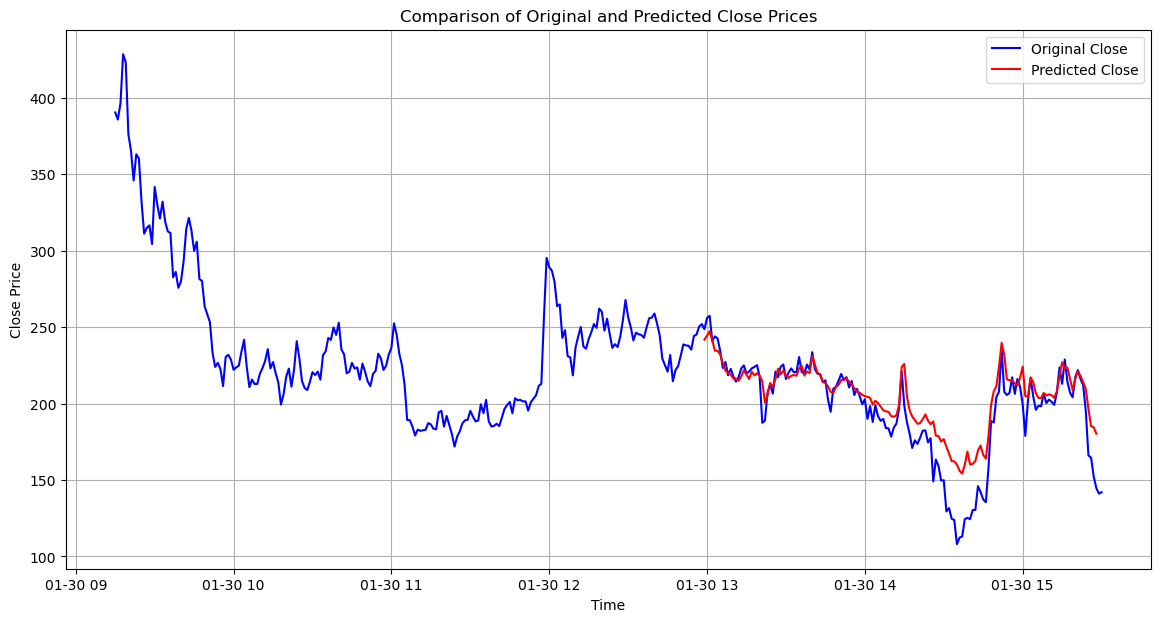

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load original data
original_data = pd.read_csv("dataset/bank.csv")
original_data['Datetime'] = pd.to_datetime(original_data['Datetime'])
original_data.set_index('Datetime', inplace=True)

# Load predicted data
predicted_data = pd.read_csv("dataset/result5.csv")
predicted_data['lasttradetime'] = pd.to_datetime(predicted_data['lasttradetime'])
predicted_data.set_index('lasttradetime', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(original_data.index, original_data['close'], label='Original Close', color='blue')

# Plot predicted data
plt.plot(predicted_data.index, predicted_data['close'], label='Predicted Close', color='red')

plt.title('Comparison of Original and Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
